In [1]:
import cache
import meta
import meta_session

import nept
import numpy as np
import pandas as pd
import scipy.stats
import scipy.signal
from shapely.geometry import LineString, Point
from shapely.ops import split
import statsmodels.api as sm
import matplotlib.pyplot as plt

from utils import save_ttest_results

%matplotlib inline

In [9]:
info = meta_session.r066d1
group = "combined"

def get(key, info=None, group=None):
    if info is not None:
        return cache.load(f"ind-{info.session_id}", key)
    return cache.load(f"grp-{group}", key)

In [10]:
trials = get("trials", info=info)
position = get("position", info=info)
task_times = get("task_times", info=info)

In [19]:
trials[trajectory].n_epochs

38

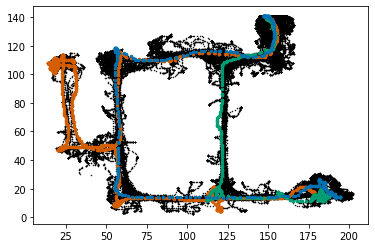

In [17]:
maze_times = nept.Epoch([], [])
for run_time in meta.run_times:
    maze_times = maze_times.join(task_times[run_time])
maze_position = position[maze_times]
plt.plot(maze_position.x, maze_position.y, "k.", ms=1.)

for trajectory in reversed(meta.behavioral_trajectories):
    plt.plot(maze_position[trials[trajectory][0]].x, maze_position[trials[trajectory][0]].y, ".", color=meta.colors[trajectory], ms=5.)

plt.show()